# Ejemplo Regresión Lineal Simple con Python

Para ello haremos uso de la clase *LinearRegression* que implementa la librería *scikit-learn* 


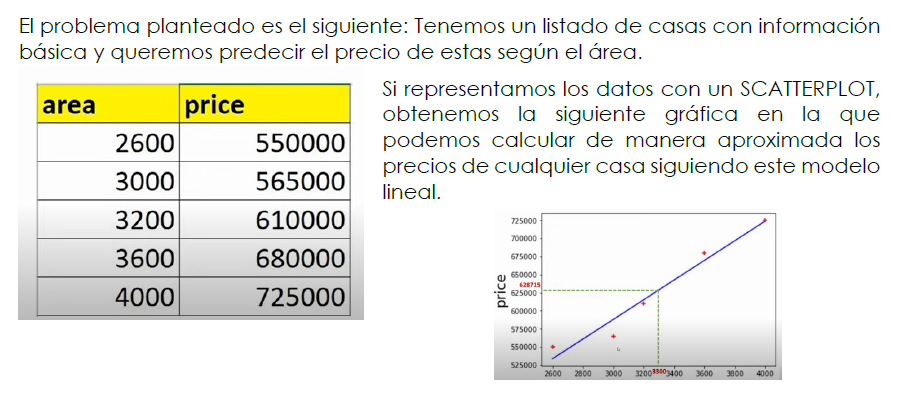

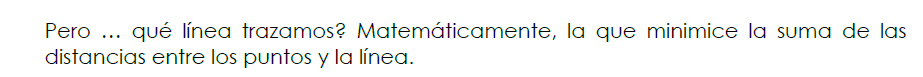

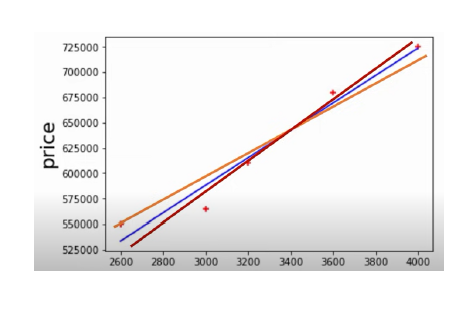

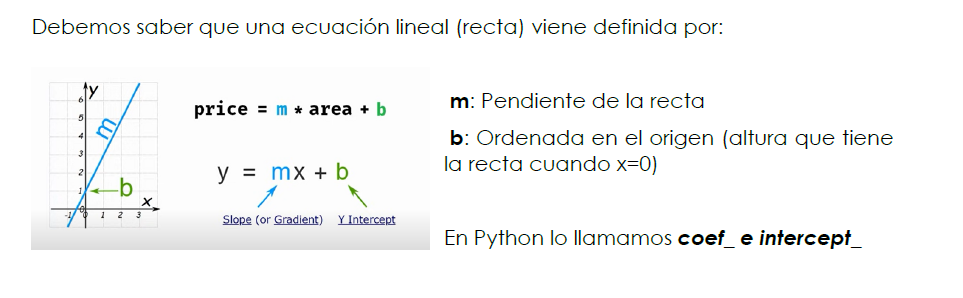

In [1]:
pip install scikit-learn

  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.1 MB 6.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 5.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 5.5 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 5.4 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 5.9 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 6.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 6.5 MB/s eta 0:00:00
Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl (43.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importo librerías
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt # para poder trazar nuestras funciones

In [3]:
#datos
x = [[1], [2], [3], [4], [5],  [6], [7], [8], [9], [10]]
y = [[2], [4], [6], [8], [10], [12], [13], [16], [18], [21]]


<h3><strong>Definición del problema</strong></h3>

Queremos construir un modelo de regresión lineal para predecir el valor de 𝑌 para 𝑋



<ul><li><strong><code>x</code></strong>: Lista de valores independientes (entrada o predictor).</li><li><strong><code>y</code></strong>: Lista de valores dependientes (resultado o etiqueta).</li></ul>

El objetivo es encontrar la ecuación:𝑌=𝑊⋅𝑋+𝑏

donde:

𝑊: Peso o pendiente que mide cuánto aumenta el valor de Y por cada unidad de X cuadrado adicional.

𝑏: Sesgo o intercepto, que indica el valor base de Y para X 0.


<h3><strong>Cargar y explorar los datos</strong></h3>

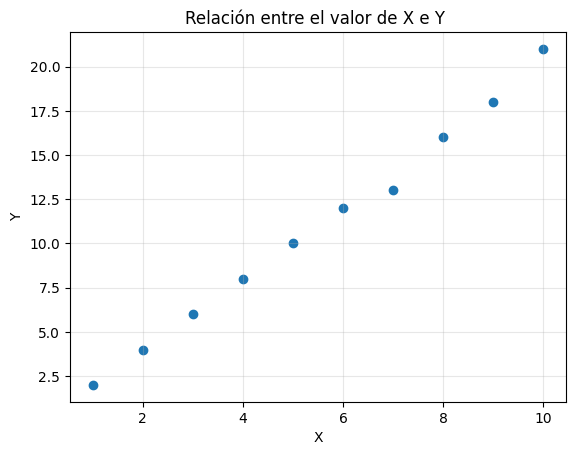

In [4]:
# Represento los datos generados, para ver si son aproximadamente lineales
#  lo hacemos usando el diagrama de puntos o dispersion
plt.scatter(x, y)
plt.title('Relación entre el valor de X e Y ')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(alpha=0.3)
plt.show()


<ul><li><strong>Por qué exploramos los datos:</strong> Para entender su distribución y verificar que haya una relación aparente entre <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>X</mi></mrow><annotation encoding="application/x-tex">X</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span></span></span></span> y <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>Y</mi></mrow><annotation encoding="application/x-tex">Y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.22222em;">Y</span></span></span></span>. 

Aquí vemos que los valores Y parecen aumentar linealmente con X.</li></ul>

<h3><strong>Entrenar el modelo</strong></h3>

 **1. CREAMOS OBJETO MODELO DE REGRESIÓN LINEAL**

 Utilizamos la librería scikit-learn para crear el modelo de regresión lineal.
 
 *from sklearn.linear_model import*

 <ul><li><strong><code>LinearRegression()</code></strong>: Crea un modelo de regresión lineal.

In [45]:
from sklearn import linear_model #módulo que implementa la clase LinearRegression
#Crear el objeto de regresión lineal
## Creo una instancia modelo de regresión lineal, haciendo uso de la clase de LinearRegression
modelo_regresion_lineal = linear_model.LinearRegression()

 **2. DIVIDIMOS**

Para ellos tenemos que usar la libreria model_selection, y su funcion train_test_split, para dividir los datos de entrenamiento y datos de prueba

<ul><li><strong><code>train_test_split</code></strong>. Alguno parámetros opcionales:
<ul><li><strong><code>test_size</code></strong>: Se reserva el x% de los datos para prueba y el y% para entrenamiento.</li><li><strong><code>random_state</code></strong>: Asegura que la división sea reproducible.</li></ul></li></ul>


<ol><li><strong><code>random_state</code>:</strong><ul><li>Controla la reproducibilidad de la división aleatoria.</li><li>Si usas el mismo valor (como 42), siempre obtendrás la misma partición.</li><li>Por defecto: No está definido, por lo que la división es diferente en cada ejecución.</li></ul></li><li><strong><code>test_size</code>:</strong><ul><li>Especifica el porcentaje o número de datos para el conjunto de prueba.</li><li>Por defecto: <strong><code>0.25</code></strong> si no se especifica.</li></ul></li></ol>


<ul><li>Si no se especifica ni <strong><code>test_size</code></strong> ni <strong><code>train_size</code></strong>:<ul><li><strong><code>test_size = 0.25</code></strong> (25% de los datos se reservan para prueba).</li></ul></li><li>Si se especifica <strong><code>train_size</code></strong>, el resto de los datos se usarán para prueba.</li></ul>

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

 **4. ENTRENAMOS**

 </li><li><strong><code>fit(x, y)</code></strong>: Entrena el modelo usando los datos proporcionados:<ul><li>Aprende la pendiente (<span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>W</mi></mrow><annotation encoding="application/x-tex">W</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">W</span></span></span></span>) y el intercepto (<span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>b</mi></mrow><annotation encoding="application/x-tex">b</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal">b</span></span></span></span>) que minimizan el error cuadrático medio (MSE).</li></ul></li></ul>

 

In [47]:
#Entrenar el modelo usando los datos de entrenamiento
# esta funcion encuentra la lista optima
modelo_regresion_lineal.fit(X_train, y_train)



LinearRegression()

In [74]:
pendiente = modelo_regresion_lineal.coef_[0][0]
intercepto = modelo_regresion_lineal.intercept_[0]
print(f"Ecuación del modelo: Y = {pendiente:.2f}X + {intercepto:.2f}")


Ecuación del modelo: Y = 2.07X + -0.37


<ul><li><strong><code>modelo.coef_</code></strong>: La pendiente (<span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>W</mi></mrow><annotation encoding="application/x-tex">W</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">W</span></span></span></span>), que indica cuánto cambia <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>Y</mi></mrow><annotation encoding="application/x-tex">Y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.22222em;">Y</span></span></span></span> por cada unidad de cambio en <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>X</mi></mrow><annotation encoding="application/x-tex">X</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span></span></span></span>.</li><li><strong><code>modelo.intercept_</code></strong>: El intercepto (<span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>b</mi></mrow><annotation encoding="application/x-tex">b</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal">b</span></span></span></span>), que es el valor de <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>Y</mi></mrow><annotation encoding="application/x-tex">Y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.22222em;">Y</span></span></span></span> cuando <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>X</mi><mo>=</mo><mn>0</mn></mrow><annotation encoding="application/x-tex">X = 0</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 0.6444em;"></span><span class="mord">0</span></span></span></span>.</li><li>La ecuación resultante describe la línea de regresión.</li></ul>

**5. REALIZAR PREDICCIONES**

In [75]:
#hacer predicciones con el modelo
y_pred = modelo_regresion_lineal.predict(X_test)
print(f"Predichos VS Reales:")
print("Predichos: ", y_pred)
print("Reales:", y_test)

Predichos VS Reales:
Predichos:  [[12.04934211]
 [ 9.98026316]
 [16.1875    ]]
Reales: [[12], [10], [16]]


**6. GRAFICAR LOS RESULTADOS**

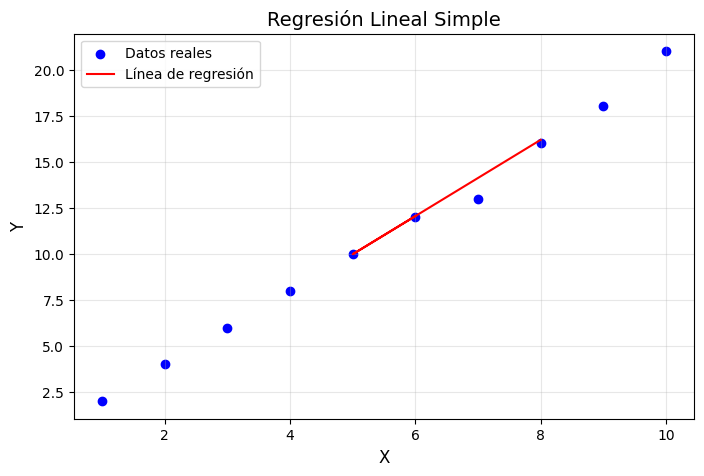

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.title('Regresión Lineal Simple', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [77]:
# Vamos a predecir cual seria el valor de y para un valor de x de 6
y_pred_2 =modelo_regresion_lineal.predict([[6]]);
print(y_pred_2)


[[12.04934211]]


*** MÁS EJEMPLOS ***

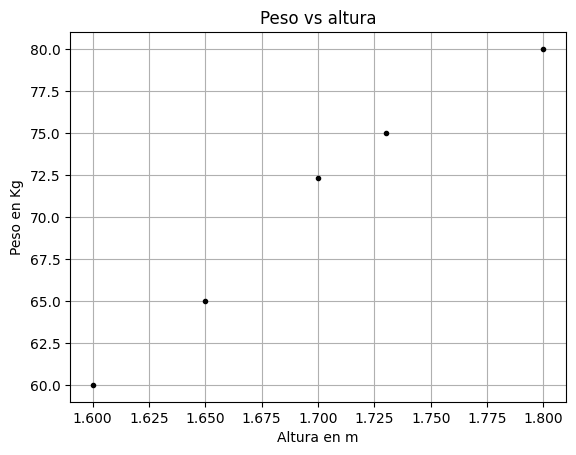

In [78]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
weights = [[60], [65], [72.3], [75], [80]]
plt.title('Peso vs altura')
plt.xlabel('Altura en m')
plt.ylabel('Peso en Kg')
plt.plot(heights, weights, 'k.')
plt.grid(True)


In [79]:
#Creamos el modelo y entrenamos con todos los datos
model = LinearRegression()
model.fit(X=heights, y=weights)

LinearRegression()

In [80]:
#hacemos una predicción
weight = model.predict([[1.5]])
weight[0][0]

np.float64(50.21114922813035)

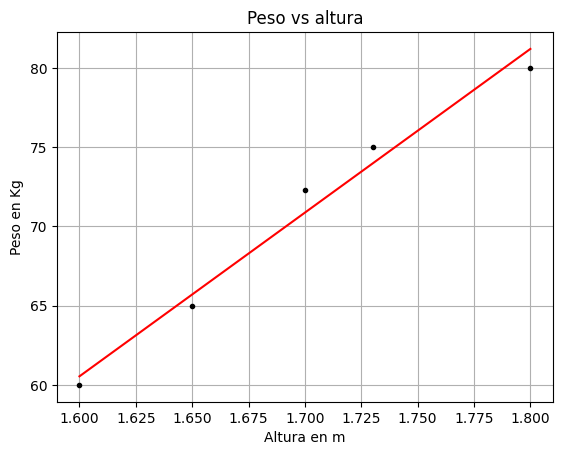

In [81]:
#plot de la regresión lineal
plt.title('Peso vs altura')
plt.xlabel('Altura en m')
plt.ylabel('Peso en Kg')
plt.plot(heights, weights, 'k.')
plt.grid(True)
plt.plot(heights, model.predict(heights), color='r')